In [23]:
%load_ext autoreload
%autoreload 2

import logging

import matplotlib.pyplot as plt
import numpy as np

from alphatools.pl import at_colors
from alphatools.pl.at_colors import show_rgba_color_list
from alphatools.pl.at_figure import AxisManager, label, save_figure

logging.basicConfig(level=logging.INFO)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Basic colors, palettes and color maps for AlphaTools

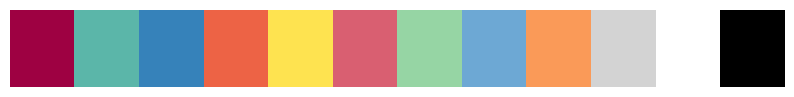

In [92]:
# colors, derived from the basic palette
colors = [
    "red",
    "green",
    "blue",
    "orange",
    "yellow",
    "lightred",
    "lightgreen",
    "lightblue",
    "lightorange",
    "grey",
    "white",
    "black",
]
show_rgba_color_list([at_colors.BaseColors.get(color) for color in colors])

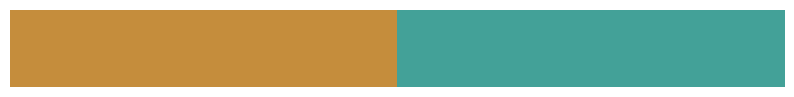

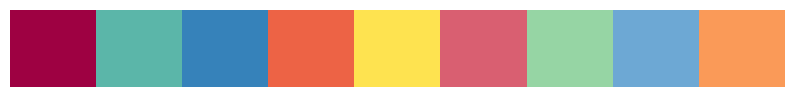

In [93]:
# color palettes
palettes = ["binary", "qualitative"]
for palette in palettes:
    show_rgba_color_list(at_colors.BasePalettes.get(palette))

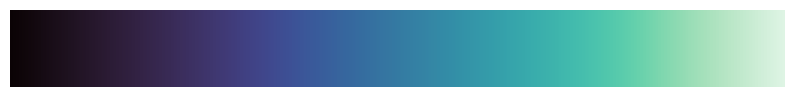

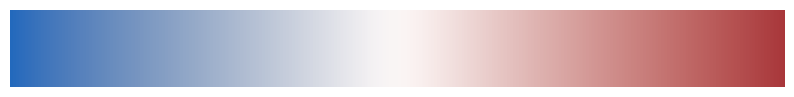

In [94]:
# colormaps
maps = ["sequential", "diverging"]
for cmap in maps:
    show_rgba_color_list(list(at_colors.BaseColormaps.get(cmap)(np.arange(0, 1, 0.001))))

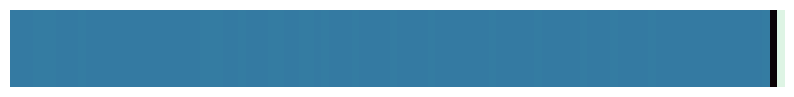

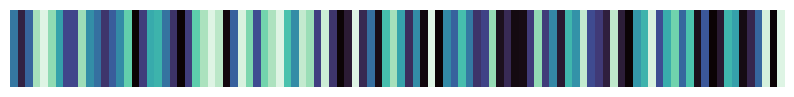

In [10]:
test_data = [*list(np.random.rand(100)), -100, 100]

# map colormaps to numerical values without capping
mapped_colors = at_colors.MappedColormaps("sequential").fit_transform(test_data)
show_rgba_color_list(mapped_colors)

# map colormaps to numerical values with capping
mapped_colors = at_colors.MappedColormaps("sequential", (5, 95)).fit_transform(test_data)
show_rgba_color_list(mapped_colors)

## Demonstrate at_figure.py submodule style & label handling

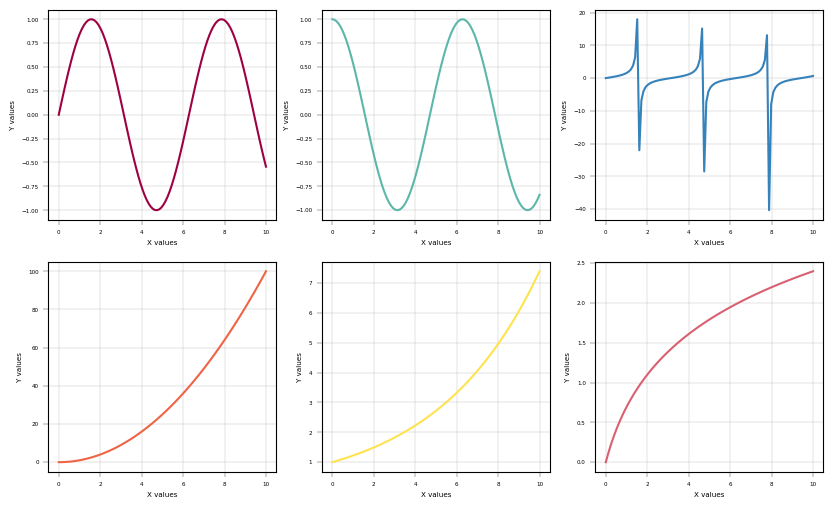

In [115]:
import numpy as np

# Create a 2x3 grid of subplots
rows = 2
cols = 3
fig, axs = plt.subplots(2, 3, figsize=(10, 6))

# Apply the AxisManager
manager = AxisManager(axs)

# Example dataset
x = np.linspace(0, 10, 100)
y_funcs = [
    lambda x: np.sin(x),
    lambda x: np.cos(x),
    lambda x: np.tan(x),
    lambda x: x**2,
    lambda x: np.exp(x / 5),
    lambda x: np.log(x + 1),
]

# Get qualitative palette
palette = at_colors.BasePalettes.get("qualitative", len(y_funcs))

# Iterate through all axes using next() and plot different functions
try:
    for i, func in enumerate(y_funcs):
        ax = manager.next()
        ax.plot(x, func(x), color=palette[i])
        label(ax, xlabel="X values", ylabel="Y values")
except StopIteration:
    pass

plt.show()

# Save the figure
save_figure(
    fig=fig,
    filename="example_figure.png",
    output_dir="./example_outputs",
    dpi=300,
    paper_width="1.5",
    paper_height="1",
    transparent=False,
    figure_padding=3,
    bbox_inches="tight",
    pad_inches=0.1,
)